<a href="https://colab.research.google.com/github/sjsu-cs133-f25/team2-spotify-music/blob/main/team2-spotify-music/notebooks%20/03_explore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Sprint 3:

# Spotify Music Dataset Data Card
Dataset Source Link: https://www.kaggle.com/datasets/thedevastator/spotify-tracks-genre-dataset

## Shape
(114000 rows, 21 columns)

## Column Dictionary
- __Unnamed: 0__: int64, acts as integer id for each row  
- __track_id__: string format of object datatype, a track id given by spotify, not all rows are unique  
- __artists__: string format of object datatype, name of the artist  
- __album_name__: string format of object datatype, name of album  
- __track_name__: string format of object datatype, name of track  
- __popularity__: int64, 0-100 value scale of popularity  
- __duration_ms__: int64, duration of the song in milliseconds  
- __explicit__: bool, tells if the song is clean or explicit  
- __danceability__: float64, 0-1 value scale of suitability for dancing  
- __energy__: float64, 0-1 value for intensity of a track  
- __key__: int64, 0-11 value representing musical key of track  
- __loudness__: float64, loudness of track in decibels  
- __mode__: int64, 0(minor) or 1(major) value representing tonal mode of track  
- __speechiness__: float64, 0-1 value representing the presence of spoken word in a track  
- __acousticness__: float64, 0-1 value representing the extent to which a track possesses an acoustic quality  
- __instrumentalness__: float64, 0-1 value representing the likelihood that a track is instrumental  
- __liveness__: float64, 0-1 value representing the presence of an audience during the recording or performance of track  
- __valence__: float64, 0-1 value representing the musical positiveness conveyed by a track  
- __tempo__: float64, tempo of the track in beats per minute  
- __time_signature__: int64, number of beats within each bar of the track  
- __track_genre__: string format of object datatype, represents genre of track (114 unique genres)

## Missing Snapshot
Columns (artists, album_name, track_name) each have a single missing value, less than 0.000001%  
Row 65900 is the row that has missing values for these columns

## Known Quirks
Column (Unnamed: 0) is largely unneeded as the default dataframe index already serves as the index for the table. It is redundant data that can be dropped from the table.

## Field Added:
Column (popularity_bucket) has been added to the DataFrame. Grouped the popularity score into five categories: 'Low', 'Medium-Low', 'Medium-High', 'High'.

# Load

In [59]:
import pandas as pd
import kagglehub
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from kagglehub import KaggleDatasetAdapter

# Download the latest dataset from kaggle
downloaded_path = kagglehub.dataset_download("thedevastator/spotify-tracks-genre-dataset")

# Load the dataset using dataset_load
songs = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "thedevastator/spotify-tracks-genre-dataset",
  "train.csv",
)

songs.head()

Using Colab cache for faster access to the 'spotify-tracks-genre-dataset' dataset.
Using Colab cache for faster access to the 'spotify-tracks-genre-dataset' dataset.


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [60]:
songs.tail()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.235,...,-16.393,1,0.0422,0.640,0.928,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.117,...,-18.318,0,0.0401,0.994,0.976,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.329,...,-10.895,0,0.0420,0.867,0.000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.506,...,-10.889,1,0.0297,0.381,0.000,0.2700,0.4130,135.960,4,world-music
113999,113999,2hETkH7cOfqmz3LqZDHZf5,Cesária Evora,Miss Perfumado,Barbincor,22,241826,False,0.526,0.487,...,-10.204,0,0.0725,0.681,0.000,0.0893,0.7080,79.198,4,world-music


# Inspect
Gather general information about the dataset

In [61]:
# dataset info
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [62]:
# dataset statistics
songs.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [63]:
# check for null values
songs[songs.isnull().any(axis=1)]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [64]:
# Drop the row with missing data
# We decided to drop this row because we cannot fill the (artists, album_name, track_name) columns
# with any default value that would make sense
# Dropping a single row will not skew the data in any significant way
songs = songs.dropna()

# Question / Inference 1:
Dev: Matthew Gouyer  
Is there a correlation between audio features and song popularity?

## Transform

In [65]:
# outline of audio features
audio_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
songs[audio_features].head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.715,87.917
1,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.267,77.489
2,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.120,76.332
3,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.143,181.740
4,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.167,119.949


In [66]:
# Pair audtion features and popularity column
pop_v_features = audio_features + ['popularity']
songs_pvf = songs[pop_v_features]

# handle missing values w/ a simple dropna statement
songs_pvf = songs_pvf.dropna()

display(songs_pvf.head())
songs_pvf.info()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity
0,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.715,87.917,73
1,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.267,77.489,55
2,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.120,76.332,57
3,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.143,181.740,71
4,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.167,119.949,82


<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   danceability      113999 non-null  float64
 1   energy            113999 non-null  float64
 2   loudness          113999 non-null  float64
 3   speechiness       113999 non-null  float64
 4   acousticness      113999 non-null  float64
 5   instrumentalness  113999 non-null  float64
 6   liveness          113999 non-null  float64
 7   valence           113999 non-null  float64
 8   tempo             113999 non-null  float64
 9   popularity        113999 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 9.6 MB


## Group / Summarize

In [67]:
# Correaltion Analysis
# Goal is to calculate and find the linear relationship between
# 'audio_features' and 'popularity'

corr_matrix = songs_pvf.corr()

corr_matrix = corr_matrix['popularity'].drop('popularity').sort_values(ascending=0)

corr_matrix

,popularity
loudness,0.050420
danceability,0.035444
tempo,0.013212
energy,0.001053
liveness,-0.005397
acousticness,-0.025458
valence,-0.040522
speechiness,-0.044930
instrumentalness,-0.095147


## Visualize

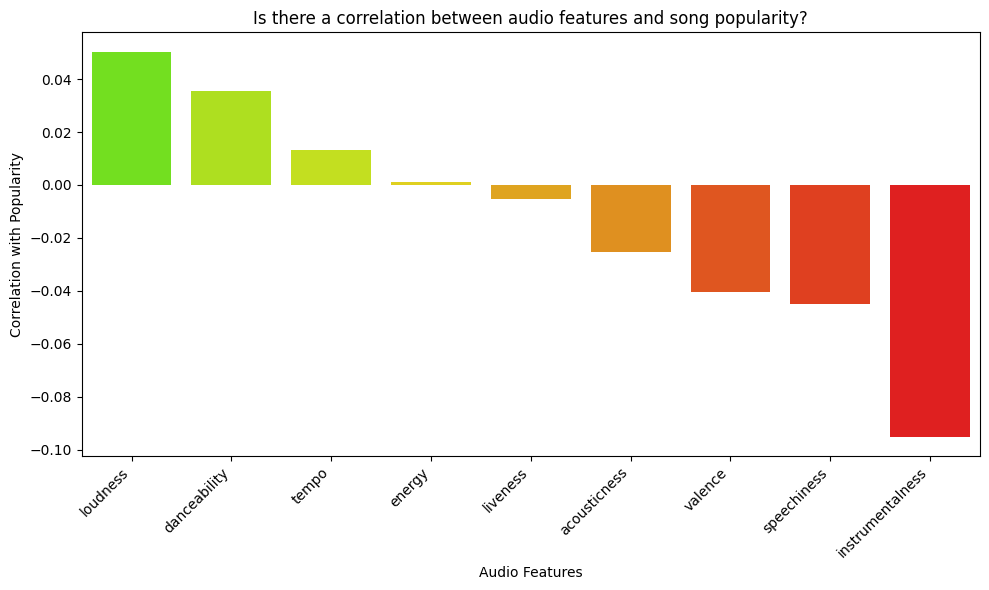

In [68]:
# Visualization of positive negative correaltion of
# audio features vs popularity

# The bar plot shows that:
# Positive correlation: Loudness, danceability, tempo, and energy
# Negative correlation: Liveness, acousticness, valence, speechiness, instrumentalness
# Therefore songs that have loudness & danceability are more likely to be popular than songs
# with other audio features.
plt.figure(figsize=(10,6))
sns.barplot(x = corr_matrix.index, y = corr_matrix.values, hue = corr_matrix.index, palette = 'prism_r')
plt.title('Is there a correlation between audio features and song popularity?')
plt.xlabel('Audio Features')
plt.ylabel('Correlation with Popularity')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()




Text(0.5, 1.0, 'Does loudness affect song popularity?')

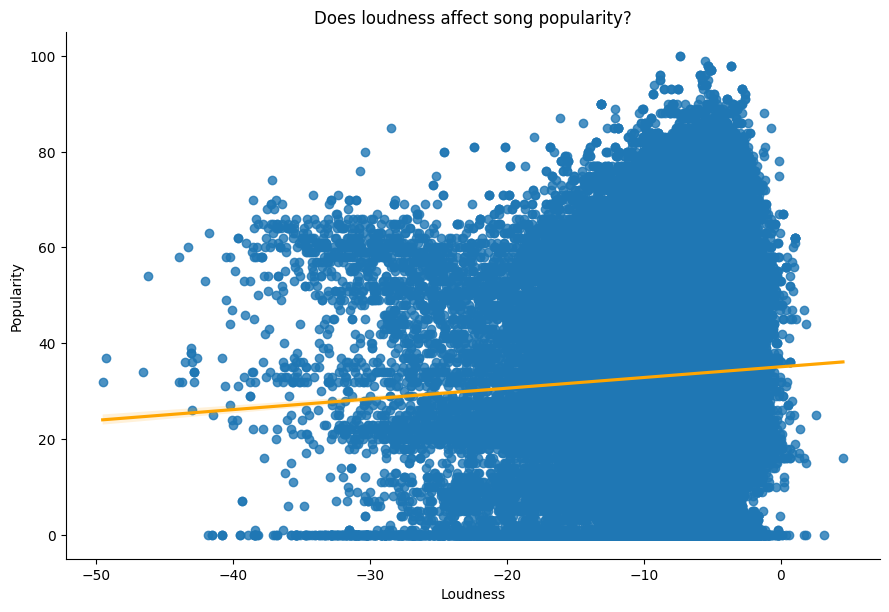

In [69]:
# Visualization of the relationship between loudness and popularity

# The lm plot shows that there is a weak correaltion between particular DB granularity vs song popularity.

# This is very interesting considering that loudness is feature that has the strongest correaltion between popularity.
sns.lmplot(data=songs_pvf, x = 'loudness', y = 'popularity', height = 6, aspect = 1.5, line_kws = {'color': 'orange'})
plt.xlabel('Loudness')
plt.ylabel('Popularity')
plt.title('Does loudness affect song popularity?')

##**Column for a heatmap**

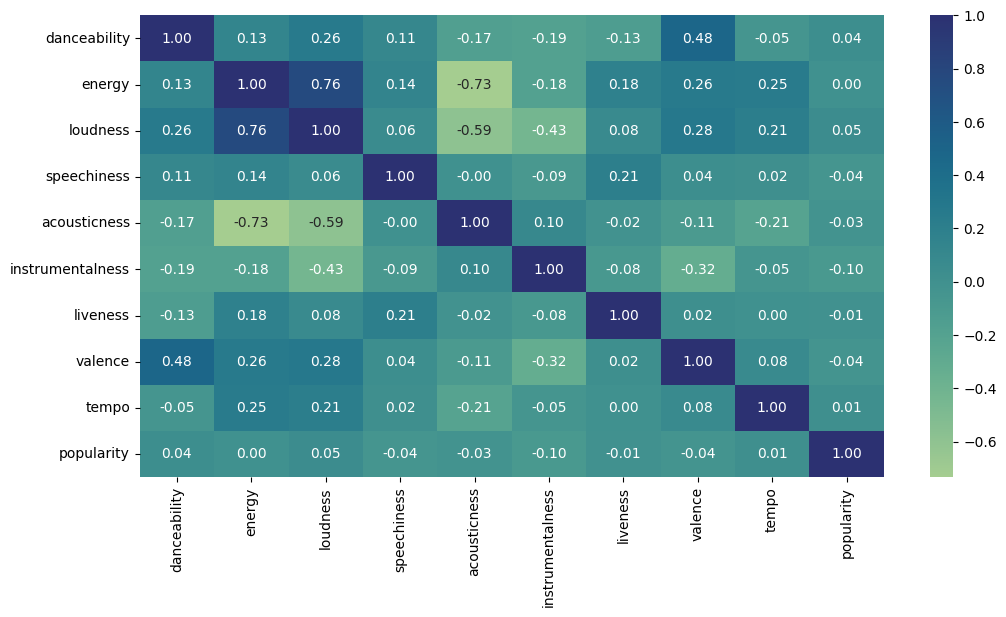

In [70]:
# Heatmap visualization of correaltion matrix.
# We do this to show a visual representation of the linear relationships between ALL audio features and popularity.
corr_matrix = songs_pvf.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='crest', fmt=".2f")
plt.show()

**What does our heatmap show us?**

We find that loudness, energy, and valence have the strongest positive clusters of correlation. While the strongest negative correlation is between acousticness and energy; at -0.73.

This suggests popularity is complex and cannot be entirely explained by the audio features within our dataset. In other words, factors external to the dataset such as marketing strategies, artist fame, and TikTok trends. These definitely play a role in shaping popularity. It's essential to remember that correlation does not equate to causation.

My next goal would be to look for non-linear relationships with pairplots potentially. And of course look at what we will learn in class and how it could be applied to our project.



##**Column for a pairplot figure demonstrating popularity buckets**



In [71]:
import pandas as pd

# Define popularity bucket boundaries and labels
popularity_bins = [0, 20, 40, 60, 80, 100]
popularity_labels = ['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High']

# Create the popularity_bucket column
songs_pvf['popularity_bucket'] = pd.cut(songs_pvf['popularity'], bins=popularity_bins, labels=popularity_labels, include_lowest=True)

display(songs_pvf.head())
songs_pvf.info()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity,popularity_bucket
0,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.715,87.917,73,Medium-High
1,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.267,77.489,55,Medium
2,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.120,76.332,57,Medium
3,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.143,181.740,71,Medium-High
4,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.167,119.949,82,High


<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   danceability       113999 non-null  float64 
 1   energy             113999 non-null  float64 
 2   loudness           113999 non-null  float64 
 3   speechiness        113999 non-null  float64 
 4   acousticness       113999 non-null  float64 
 5   instrumentalness   113999 non-null  float64 
 6   liveness           113999 non-null  float64 
 7   valence            113999 non-null  float64 
 8   tempo              113999 non-null  float64 
 9   popularity         113999 non-null  int64   
 10  popularity_bucket  113999 non-null  category
dtypes: category(1), float64(9), int64(1)
memory usage: 9.7 MB


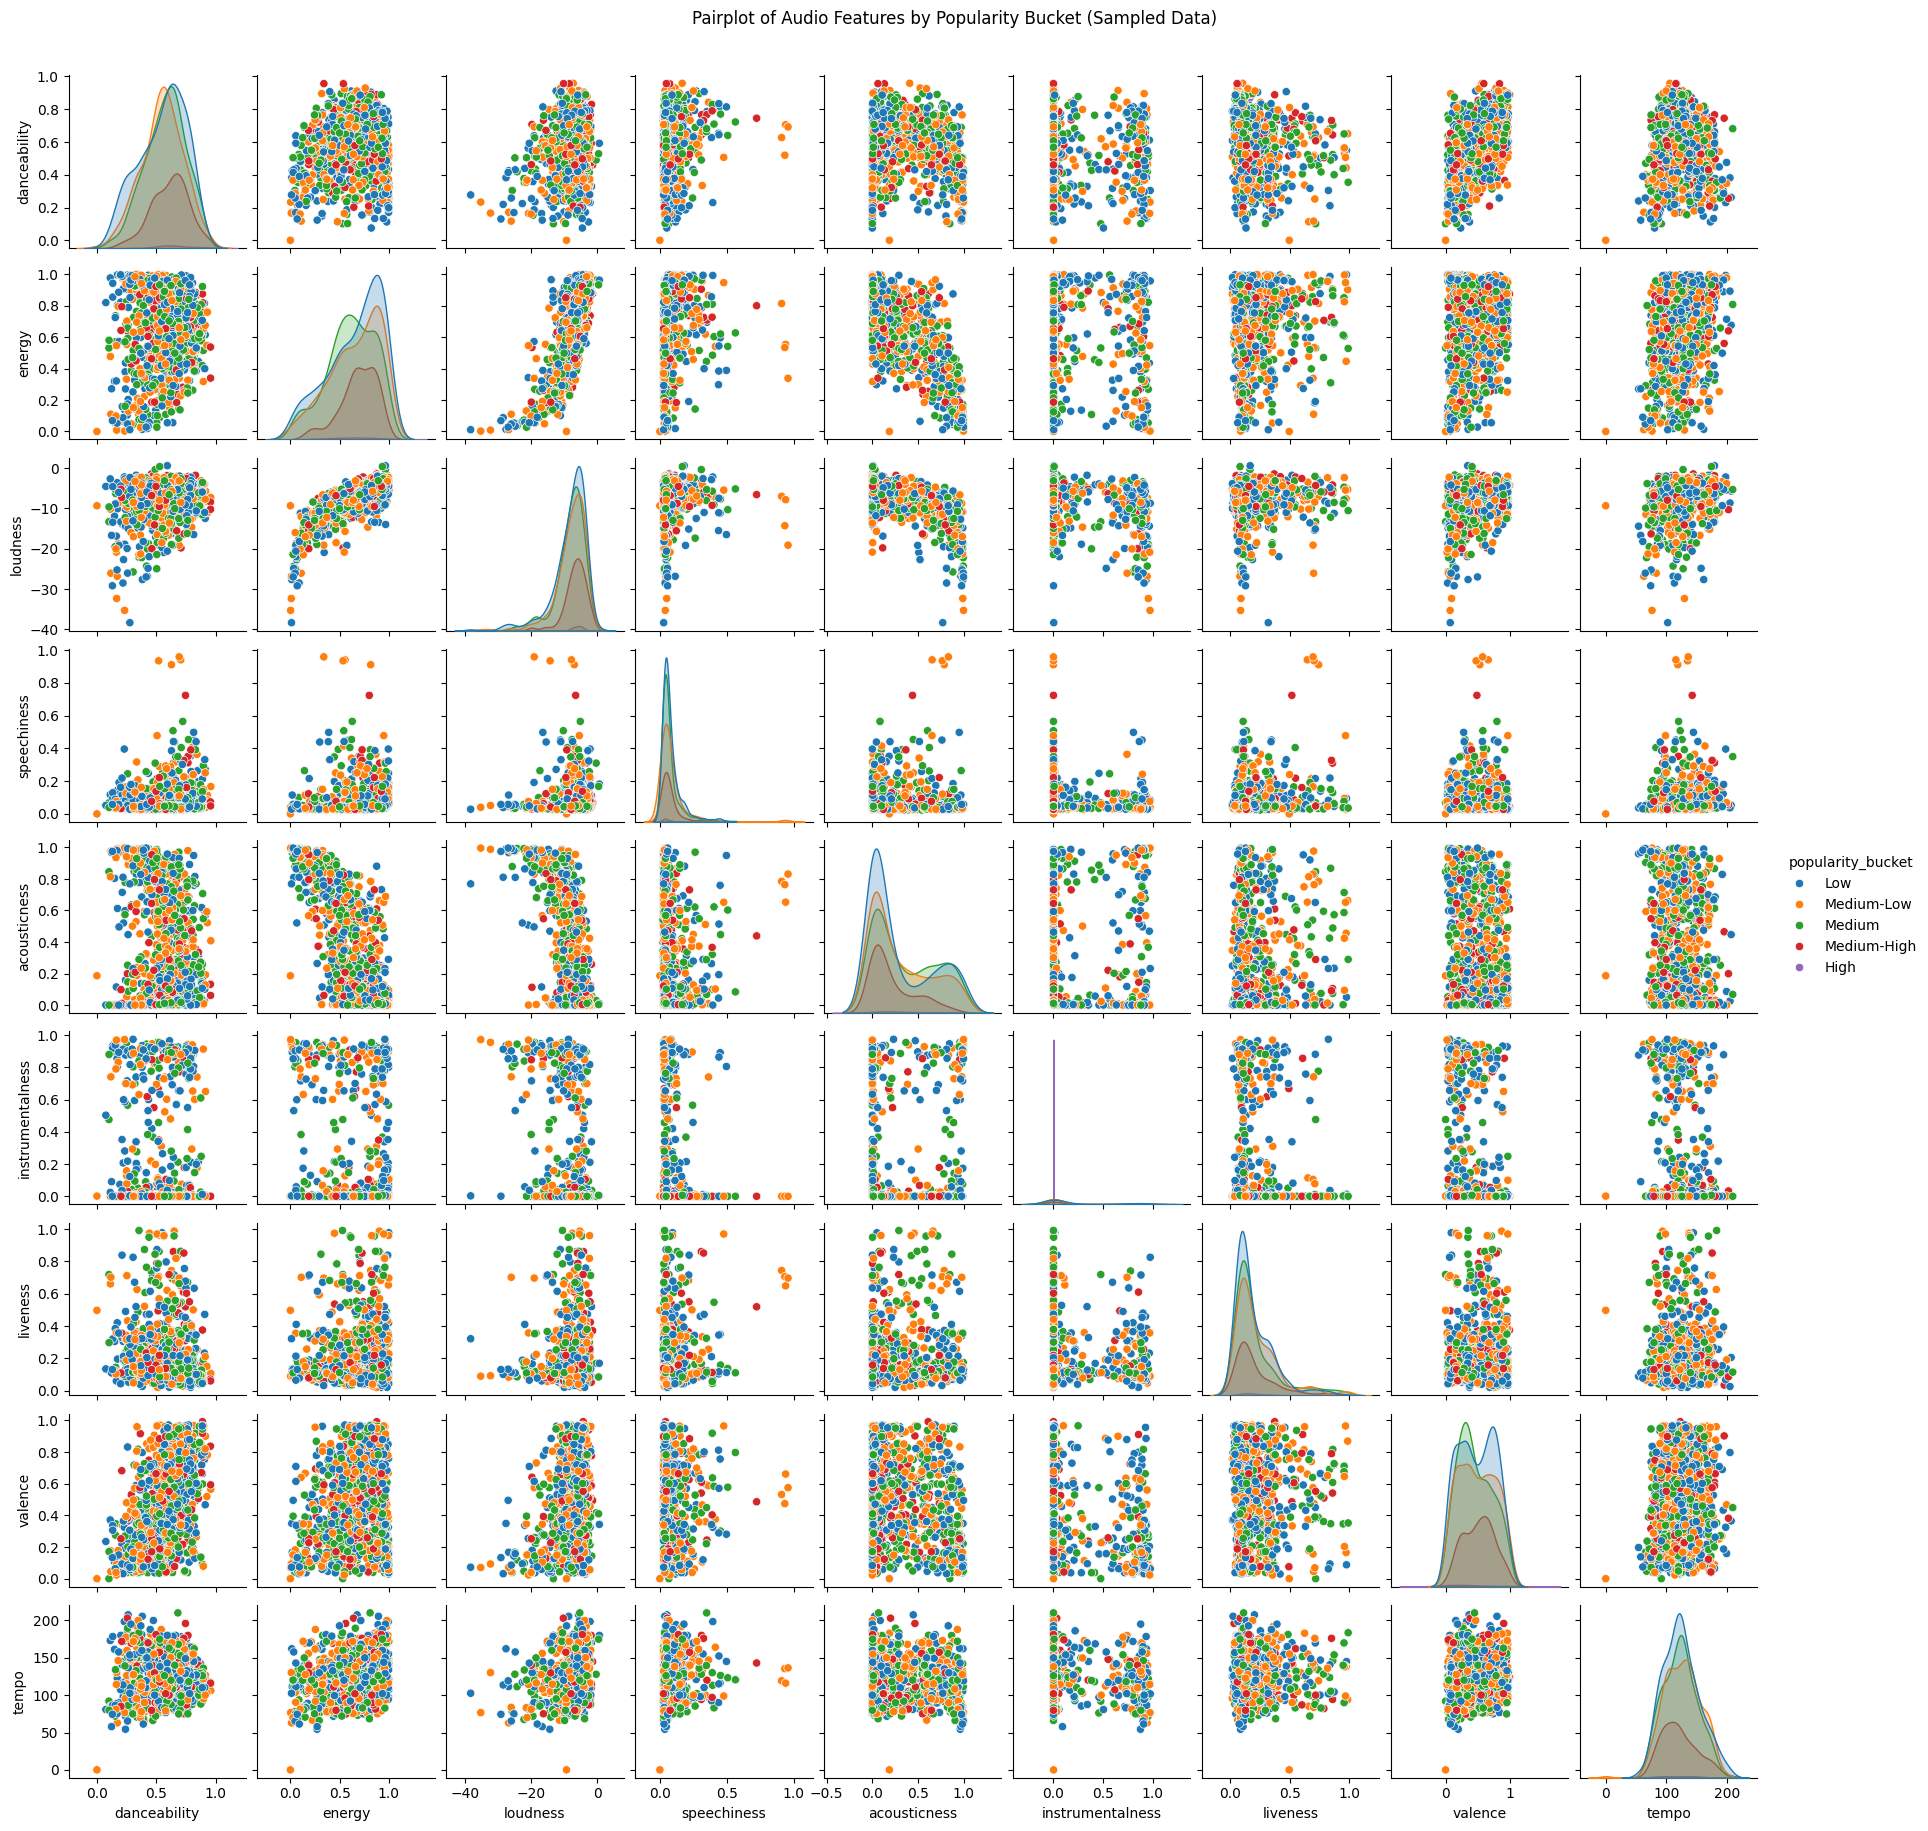

In [72]:
# Create the pairplot on a sampled subset of the data to show relationship between audio feature, colored by popularity buckets
songs_pvf_sampled = songs_pvf.sample(n=1000, random_state=42)

sns.pairplot(songs_pvf_sampled, vars=audio_features, hue='popularity_bucket', height=2)
plt.suptitle('Pairplot of Audio Features by Popularity Bucket (Sampled Data)', y=1.02)
plt.show()

### Pairplot Analysis

- **Diagonal**: The diagonal plots show the distribution of each individual audio feature (EX: danceability, energy). Each point in the scatterplot represents a song.
- **Coloring**: The points in the scatterplots are colored according to the 'popularity_bucket' column created. This allows us to visually inspect if there are any noticeable patterns or clusters of popularity within the relationships between the audio features.

From this pairplot, it shows that there is a correlation between higher loudness with higher popularity buckets. On the other hand, other features like instrumentals and accousticness has a weak negative association.

##**Compute the simple slope / R^2 of the relationship between energy and danceabilty within each popularity bucket**

In [78]:
import numpy as np

# Initialize dictionary to store results
results = {}

# Loop through each popularity bucket
for bucket in songs_pvf['popularity_bucket'].cat.categories:
    bucket_df = songs_pvf[songs_pvf['popularity_bucket'] == bucket].copy()

    # Check if there is enough data to compute slope and R^2
    if len(bucket_df) > 1:
        # Calculate the means of danceability and energy
        mean_danceability = np.mean(bucket_df['danceability'])
        mean_energy = np.mean(bucket_df['energy'])

        # Calculate the slope
        numerator = np.sum((bucket_df['danceability'] - mean_danceability) * (bucket_df['energy'] - mean_energy))
        denominator = np.sum((bucket_df['danceability'] - mean_danceability)**2)

        if denominator != 0:
            slope = numerator / denominator
            intercept = mean_energy - slope * mean_danceability

            # Calculate the predicted energy values
            predicted_energy = slope * bucket_df['danceability'] + intercept

            # Calculate the residuals
            residuals = bucket_df['energy'] - predicted_energy

            # Calculate the sum of squares of the residuals
            sum_of_squares_residuals = np.sum(residuals**2)

            # Calculate the total sum of squares
            total_sum_of_squares = np.sum((bucket_df['energy'] - np.mean(bucket_df['energy']))**2)

            # Compute R^2 manually
            if total_sum_of_squares != 0:
                r_squared = 1 - (sum_of_squares_residuals / total_sum_of_squares)
            else:
                r_squared = np.nan

            # Store the results
            results[bucket] = {'slope': slope, 'r_squared': r_squared}
        else:
            results[bucket] = {'slope': None, 'r_squared': None}
    else:
        results[bucket] = {'slope': None, 'r_squared': None}

# Display the results
for bucket, values in results.items():
    print(f"Popularity Bucket: {bucket}")
    if values['slope'] is not None:
        print(f"Slope (Danceability vs Energy): {values['slope']:.4f}")
        if not np.isnan(values['r_squared']):
            print(f"R-squared: {values['r_squared']:.4f}")
        else:
            print("R-squared: Cannot be computed (no variance in energy)")
    else:
        print("Insufficient data to compute slope and R-squared")

Popularity Bucket: Low
Slope (Danceability vs Energy): 0.2890
R-squared: 0.0435
Popularity Bucket: Medium-Low
Slope (Danceability vs Energy): 0.1428
R-squared: 0.0089
Popularity Bucket: Medium
Slope (Danceability vs Energy): 0.1543
R-squared: 0.0105
Popularity Bucket: Medium-High
Slope (Danceability vs Energy): 0.1710
R-squared: 0.0146
Popularity Bucket: High
Slope (Danceability vs Energy): 0.0785
R-squared: 0.0053


## Findings

Some key findings from the data:
- Loudness, danceability, and tempo seem to all have some positive correlation with song popularity
- Acousticness, valence, speechiness, and instrumentalness all seem to have some negative correlation with popularity
- Energy and liveness don't seem to have any significant correlation with popularity


# Question / Inference 2:
Dev: Jadon Camacho  
Is there a relationship between song duration and song popularity?

## Data Updates:
  - For this sprint, I shifted focus to involve song energy levels along with duration and popularity.
  - The dataframe used for the visualization plots was adjusted to include more data this time around: is_popular column holding a binary value, and energy level holding a value between 0 and 1.
  - New visualizations include a box categorical plot as well as a polynomial regression plot.


## Transform

In [ ]:
# narrow down focus to song duration and song energy with a popularity boolean

# add series for duration in minutes
songs["duration_min"] = songs.duration_ms / 60000

# add series for binary popularity
# song is popular if popularity value > 70
songs["is_popular"] = songs.popularity.apply(lambda x: 1 if x > 70 else 0)

# add series for grouping songs by song length (intervals of 2 minutes)
# categorical bucketing:
#   songs are grouped by duration in buckets of 0-2 minutes, 2-4 minutes, ... , 10+ minutes
#   bins are right-inclusive (upper boundary)
songs["duration_group"] = pd.cut(
    songs.duration_min,
    bins=[0, 2, 4, 6, 8, 10, songs.duration_min.max()],
    labels=["0-2", "2-4", "4-6", "6-8", "8-10", "10+"]
)

# new dataframe for relevant information (duration, energy, is_popular)
songs_filtered = songs[["duration_min", "duration_group","energy", "is_popular"]].dropna()
songs_filtered.head()

,duration_min,duration_group,energy,is_popular
0,3.844433,2-4,0.4610,1
1,2.493500,2-4,0.1660,0
2,3.513767,2-4,0.3590,0
3,3.365550,2-4,0.0596,1
4,3.314217,2-4,0.4430,1


## Group / Summarize

In [ ]:
# consider distribution of songs within each bin

# filtered songs are grouped by their duration bin
# list the amount of songs within each bin
songs_filtered.groupby("duration_group").size()

/tmp/ipython-input-254982056.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  songs_filtered.groupby("duration_group").size()


,0
duration_group,
0-2,6299
2-4,68520
4-6,31424
6-8,5823
8-10,1330
10+,603


## Visualize

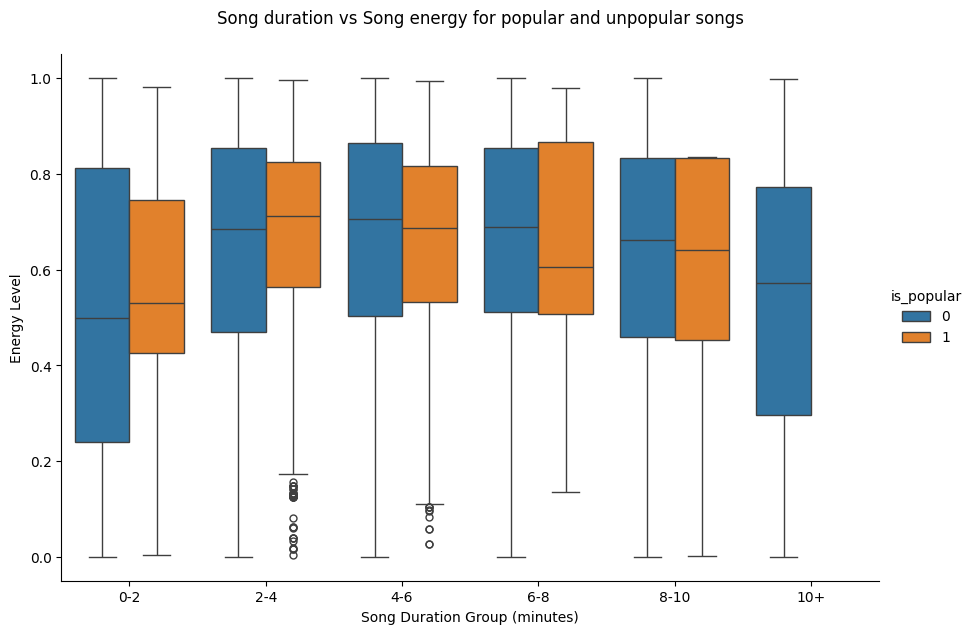

In [ ]:
# visualize data with categorical distributions

g=sns.catplot(
    data=songs_filtered,
    x="duration_group",
    y="energy",
    hue="is_popular",
    kind="box",
    height=6,
    aspect=1.5
)

# descriptive titles
g.fig.suptitle("Song duration vs Song energy for popular and unpopular songs", y=1.05);
g.set_axis_labels("Song Duration Group (minutes)", "Energy Level")

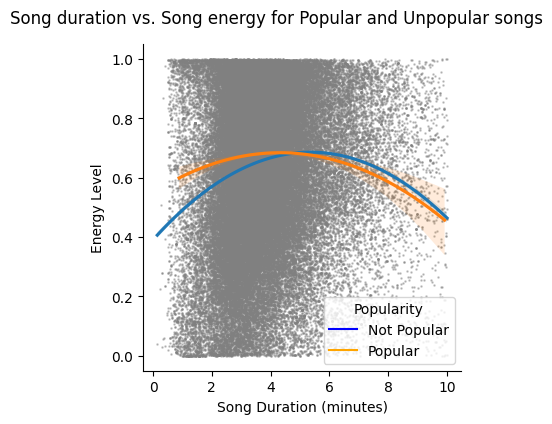

In [ ]:
#visualize data with regression lines


g=sns.lmplot(
    data=songs_filtered[songs_filtered.duration_min < 10],
    x="duration_min",
    y="energy",
    hue="is_popular",
    height=4,
    ci=95,
    order=2,
    markers='.',
    scatter_kws={"color":"grey", "alpha": 0.4, 's':3},
    legend=False  # no need, manually creating new legend
)

# descriptive titles
g.fig.suptitle("Song duration vs. Song energy for Popular and Unpopular songs", y=1.05);
g.set_axis_labels("Song Duration (minutes)", "Energy Level")

# manually create legend for regression lines (popular and unpopular)
line_unpop = mlines.Line2D([], [], color="blue", label="Not Popular")
line_pop   = mlines.Line2D([], [], color="orange", label="Popular")
plt.legend(handles=[line_unpop, line_pop], title="Popularity")

## Findings

PA3 Findings:
  - The general trend in both visualization graphs show that there is a peak in energy levels of songs within the 2-8 minute range. Songs shorter or longer than these trend towards lower levels of energy.
  - The box plot suggests that popular songs tend to have a very slightly higher energy level on average. This indicates that people generally gravitate toward energetic songs.
  - The regression plot shows that the peak of energy levels of popular songs is located at a slightly shorter duration value than that of unpopular songs. This suggests that people favor shorter songs on average.

# Question / Inference 3:
Dev: Matthew Wong
Is there a relationship between explicit songs and song popularity

## Transform

In [ ]:
# Categorical Bucketing / map
# Handling missing data

# Created new column named "popularity_lvl"
# Popularity is "high" if popularity >= 75
# "med" if 50 <= popularity < 75
# "low" for all other values
songs["popularity_lvl"] = songs.popularity.map(lambda p: "high" if p >= 75 else ("med" if p >= 50 else "low"))

# Drop the row with missing data
# We decided to drop this row because we cannot fill the (artists, album_name, track_name) columns
# with any default value that would make sense
# Dropping a single row will not skew the data in any significant way
songs = songs.dropna()
songs.info()
songs.head()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Unnamed: 0        113999 non-null  int64   
 1   track_id          113999 non-null  object  
 2   artists           113999 non-null  object  
 3   album_name        113999 non-null  object  
 4   track_name        113999 non-null  object  
 5   popularity        113999 non-null  int64   
 6   duration_ms       113999 non-null  int64   
 7   explicit          113999 non-null  bool    
 8   danceability      113999 non-null  float64 
 9   energy            113999 non-null  float64 
 10  key               113999 non-null  int64   
 11  loudness          113999 non-null  float64 
 12  mode              113999 non-null  int64   
 13  speechiness       113999 non-null  float64 
 14  acousticness      113999 non-null  float64 
 15  instrumentalness  113999 non-null  float64 
 16  livenes

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min,is_popular,duration_group,popularity_lvl
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0.000001,0.3580,0.715,87.917,4,acoustic,3.844433,1,2-4,med
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,0.000006,0.1010,0.267,77.489,4,acoustic,2.493500,0,2-4,med
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,0.000000,0.1170,0.120,76.332,4,acoustic,3.513767,0,2-4,med
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,0.000071,0.1320,0.143,181.740,3,acoustic,3.365550,1,2-4,med
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,0.000000,0.0829,0.167,119.949,4,acoustic,3.314217,1,2-4,high


## Group / Summarize

In [ ]:
# multi column groupby with agg and sorting

# All songs are grouped by (popularity_lvl, explicit) in a muli-column table
# Each key is aggregated by its count in the table and the table is sorted descending by count
songs.groupby(["popularity_lvl", "explicit"]).track_name.agg(["count"]).sort_values(by="count", ascending=False)

count
popularity_lvl explicit       
low            False     78198
med            False     23769
low            True       6434
med            True       2767
high           False      2285
               True        546

In [ ]:
# groupby agg with mean and sorted values

# Songs are grouped by (explicit) column and each key has its mean popularity calculated and stored
# Mean values are sorted in descending order
popularity_mean = songs.groupby("explicit").popularity.agg(["mean"]).sort_values(by="mean", ascending=False)
popularity_mean

,mean
explicit,
True,36.454191
False,32.938207


## Visualize


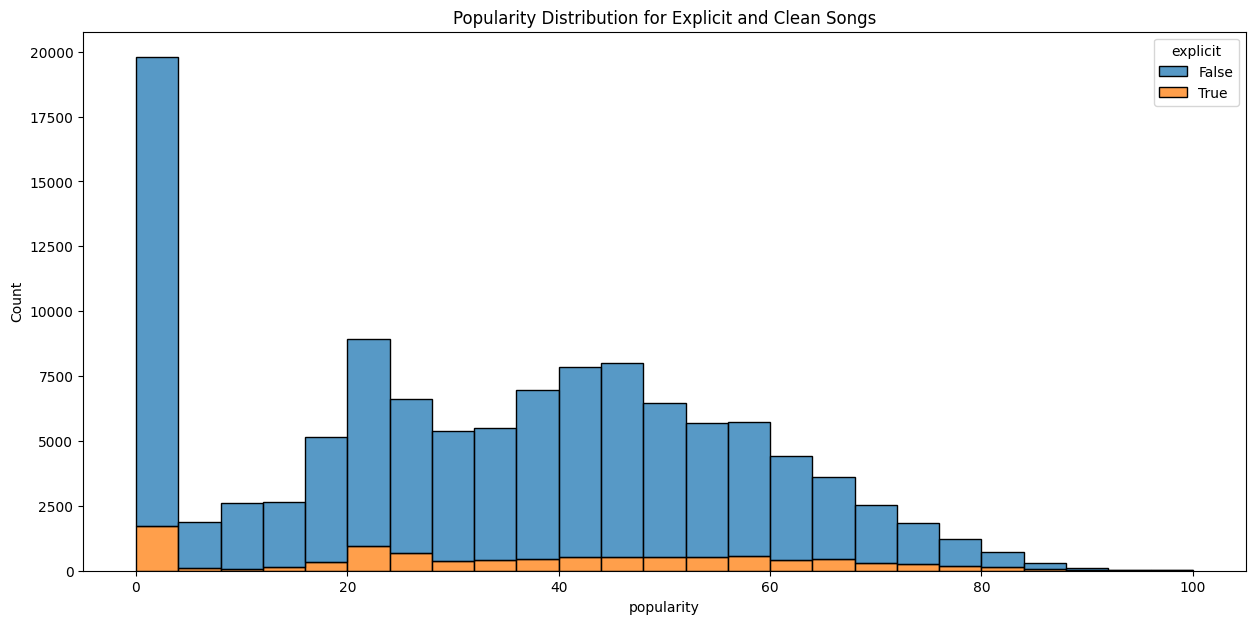

In [ ]:
# Histogram showing the popularity distribution for explicit and clean songs
# Both distributions are shown stacked on each other, where blue is clean and orange is explicit
plt.figure(figsize=(15, 7))
sns.histplot(data=songs, x="popularity", hue="explicit", multiple="stack", bins=25)
plt.title("Popularity Distribution for Explicit and Clean Songs")
plt.show()

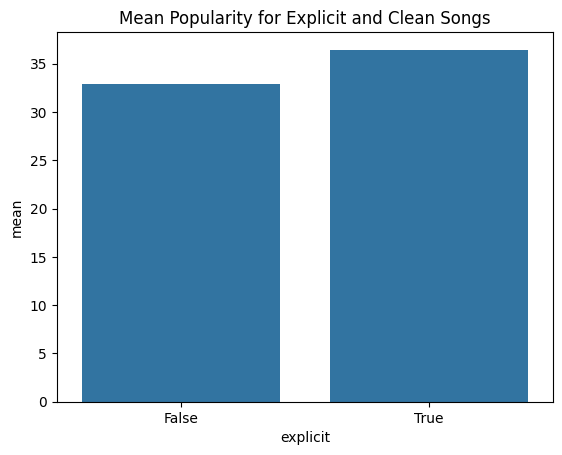

In [ ]:
# Bar plot comparing the mean popularity between explict songs and clean songs
sns.barplot(data=popularity_mean, x=popularity_mean.index, y="mean")
plt.title("Mean Popularity for Explicit and Clean Songs")
plt.show()

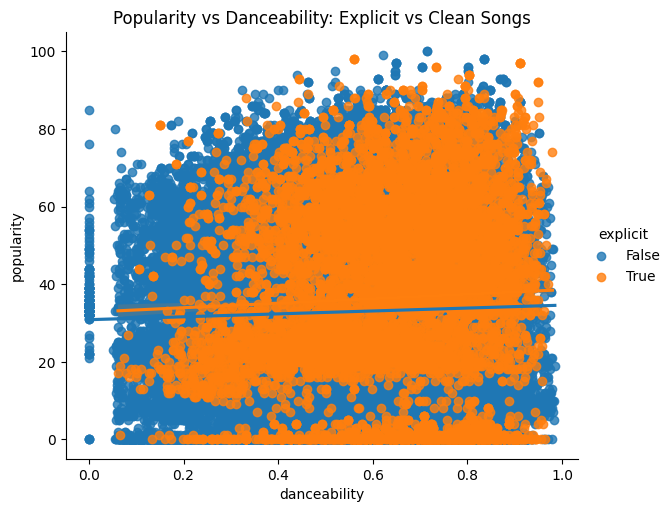

In [ ]:
# Refine Questions → Visual Hypotheses
# How do explicit tracks compare to non-explicit tracks?
# Hypothesis: Explicit tracks will have a higher mean popularity score compared to clean tracks when comparing danceaibility

# Visualize the relationship between danceability and popularity for explicit songs
sns.lmplot(
    data=songs,
    x="danceability",
    y="popularity",
    hue="explicit",   # separate regression lines for clean vs explicit
    height=5, aspect=1.2
)
plt.title("Popularity vs Danceability: Explicit vs Clean Songs")
plt.show()

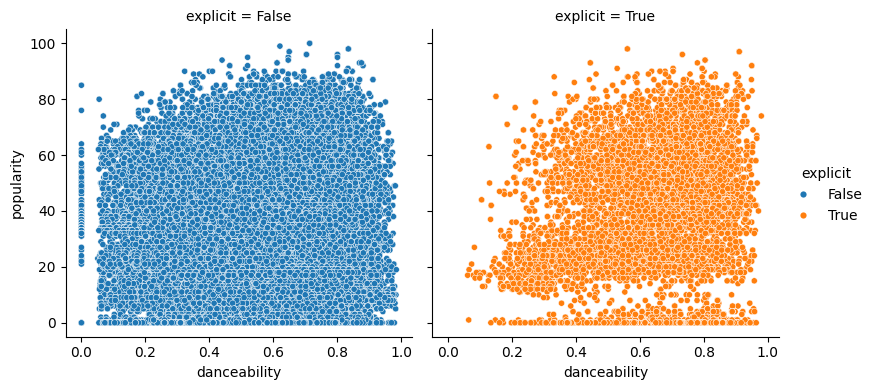

In [ ]:
#Create 1 small-multiples grid via row=/col=/col_wrap to condition on a category or time.
#Visualize relationship between popularity and danceability in terms of explicit songs

# wrapped columns small multiples
#g=sns.relplot(
g=sns.relplot(
    data=songs,
    x="danceability",
    y="popularity",
    hue="explicit",
    col="explicit",
    col_wrap=2,
    height=4,
    s=20
)

## Findings

**Regression Plot**

---

The regression plot generated using sns.lmplot visualizes the relationship between dance ability and popularity with separate regression lines for explicit and clean songs that are distinguished by colors. The graph shows that explicit songs trend slightly higher in popularity than clean songs across lvels of dance ability.

**Small Multiple Grid**

---

The small-multiples scatter plot generated using seaborn.relplot visualizes the relationship between dance ability and popularity, creating separate panels for explicit and clean songs. The spread suggests that explicit songs tend to be slightly more popular on average than clean songs.

**Categorical Distribution Comparison**

---


The box plot generated using seaborn.catplot visualizes and compares the distribution of song popularity between explicit and clean tracks.
The catplot suggests that explicit songs tend to have a slightly higher median popularity compared to clean songs